<a href="https://colab.research.google.com/github/taobeto/neuroscience/blob/main/Carlos_Alberto_Pena_Sanchez_Lab3Phase_Plane_Analysis_VClase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Campos Vectoriales Planares

Para sistemas de EDOs en 2D es posible tener una descripción cualitativa y geométrica del comportamiento del sistema
gracias a que podemos visualizar el comportamiento de las 2 variables en un plano.

Este cuaderno explora el modelo FitzHugh-Nagumo, un sistema simplificado que describe el comportamiento de membranas neuronales. Dividiremos el análisis en varias secciones: cálculo del retrato de fase, cálculo de las curvas nulas (nullclines), identificación de puntos de equilibrio y su estabilidad, y exploraremos cómo una bifurcación puede ser inducida por cambios en la corriente externa.

Para este análisis, usamos las ecuaciones:

$$
\frac{dV}{dt}=V-\frac{V^3}{3}-w+I_{ext} \\
\frac{dw}{dt}=\frac{1}{\tau}(V+a-bw)
$$

donde:

- $V$: Potencial de membrana.
- $w$: Variable de recuperación
- $I_{ext}$: Corriente externa constante.
- $a$, $b$, y $\tau$: parámetros de ajuste.

Usando los valores de parámetros $a = 0.3$, $b = 1.4$ y $\tau = 20$, realice los siguientes ejercicios:

## Ejercicio 1: Protocolo de Estimulación por pulsos

Simule el sistema de FN en el intervalo (-50,300) el -50 hace que cuando grafiquemos el tiempo desde 0, el sistema habrá ya evolucionado hacia el atractor adecuado. Use un protocolo de estimulación usando $I_{ext}(t)$ = 0.05 en el
intervalo $10<t<15$, 0.1 en $110<t<115$ y 0.15 en $210<t<215$.

Grafique las soluciones de $V$y $w$ en el tiempo, grafique en un panel debajo también la corriente de estimulación. Finalmente en otro panel muestre el resultado de las trayectorias en el espacio de estados. Describa sus observaciones.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

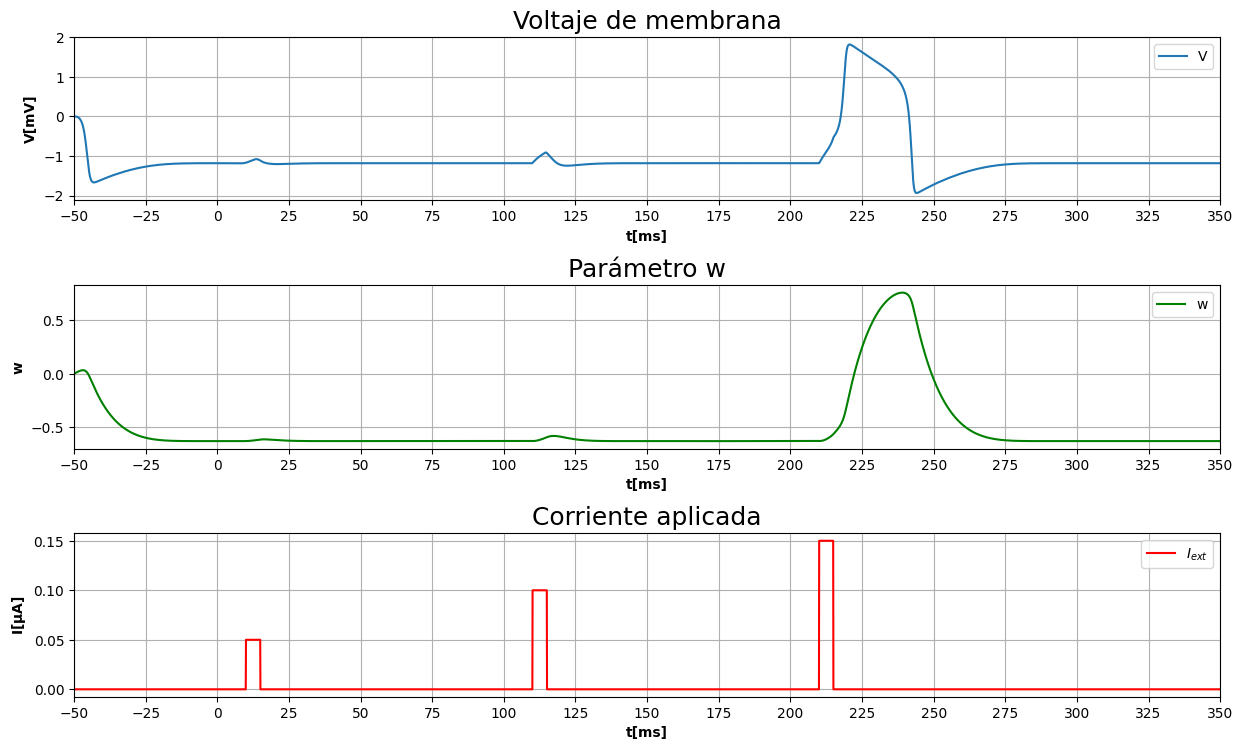

In [ ]:
def Iext(t):
  if t < 10:
    return 0
  elif t>=10 and t< 15:
    return 0.05
  elif  t >= 110 and t<115:
    return 0.1
  elif t >= 210 and t < 215:
    return 0.15
  else:
    return 0



def FitzHugh_Nagumo(t, X, a, b, tau):
  V  = X[0]
  w = X[1]
  I_ext = Iext(t)

  dVdt = V - (V**3)/3-w+I_ext
  dwdt = (1/tau)*(V+a-b*w)

  return [dVdt, dwdt]

a,b,tau = 0.3, 1.4, 20
tspan = [-50, 350]
X0 = [0,0]
solucion = solve_ivp(FitzHugh_Nagumo, tspan, X0,
                     args = (a,b,tau), dense_output = True)

tdenso = np.linspace(tspan[0], tspan[-1], 5000)
V, w = solucion.sol(tdenso)

Iaplicada = np.array([Iext(i) for i in tdenso])

fig, axs = plt.subplots(3,1, figsize = (13,8))
fig.tight_layout(pad = 4.0)


axs[0].plot(tdenso,V, label='V')
axs[0].set_title('Voltaje de membrana', fontsize = 18)
axs[0].set_ylabel('V[mV]', fontweight = 'bold')
axs[0].set_xlabel('t[ms]', fontweight = 'bold')
axs[0].set(xlim = (-50,350), xticks = np.arange(-50,375, 25))
axs[0].grid()
axs[0].legend()

axs[1].plot(tdenso, w, color ='green', label = 'w')
axs[1].set_title('Parámetro w', fontsize = 18)
axs[1].set_ylabel('w', fontweight = 'bold')
axs[1].set_xlabel('t[ms]', fontweight = 'bold')
axs[1].set(xlim = (-50, 350), xticks = np.arange(-50,375, 25))
axs[1].grid()
axs[1].legend()

axs[2].plot(tdenso, Iaplicada, color = 'red', label ='$I_{ext}$')
axs[2].set_title('Corriente aplicada', fontsize = 18)
axs[2].set_ylabel(r'I$ \mathbf{[\mu A]}$', fontweight = 'bold')
axs[2].set_xlabel('t[ms]', fontweight = 'bold')
axs[2].set(xlim = (-50, 350), xticks = np.arange(-50,375, 25))
axs[2].grid()
axs[2].legend()



fig.show()

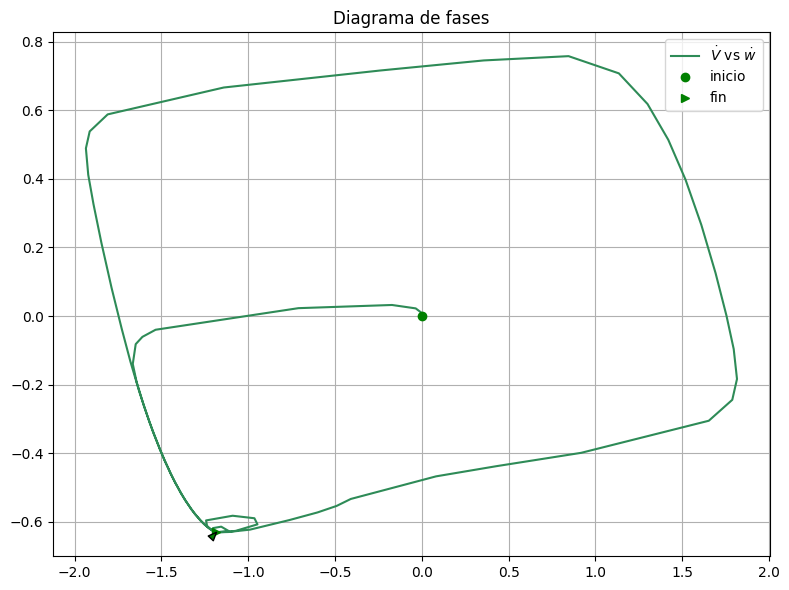

In [ ]:
dVdt, dwdt = solucion.y

plt.figure( figsize = (8,6))
plt.title('Diagrama de fases')
plt.plot(dVdt, dwdt, label = '$\dot{V}$ vs $\dot{w}$', color = 'seagreen')
plt.tight_layout()
plt.plot(V[0], w[0], 'go', label = 'inicio')
plt.plot(V[-1],w[-1], 'g>', label = 'fin')
plt.annotate('', xy = (V[-1], w[-1]), xytext= (V[-2], w[-2]),
             arrowprops=dict(facecolor = 'green',
                             width = 1, headwidth = 5, headlength = 6))
plt.legend()

plt.grid()

## Observaciones.
Al comparar los primeros tres gráficos, de voltaje de membrana, parámetro w y corriente aplicada se observó que los primeros dos pulsos inducidios si bien alcanzan a representar una pequeña exitación en el votaje de membrana, no son suficientes para lograr un impulso nereviso. Por otro lado, el tercer pulso induce un estado activo en la célula representado tanto en V como en w.
El diagrama de fase brinda información soble la evolución del sistema, en el último pulso, se llega a un punto estable.

## Ejercicio 2: Protocolo de estimulación DC

Repita el ejercicio anterior pero usando una corriente constante igual a $I_{ext}=0.23$ en el intervalo $10<t<260$. Describa nuevamente lo observado.

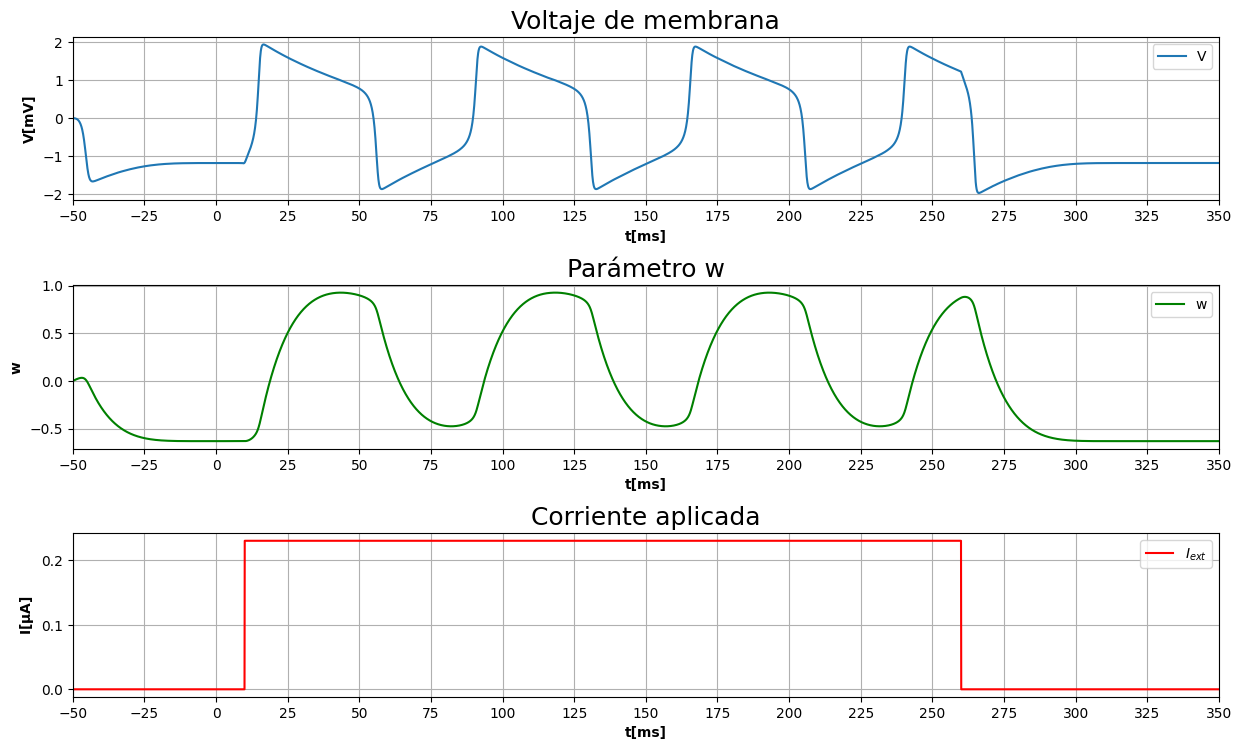

In [ ]:
def Iext(t):
  if t < 10:
    return 0
  elif t>=10 and t< 260:
    return 0.23
  else:
    return 0

tspan = [-50, 350]
tdenso = np.linspace(tspan[0], tspan[-1], 5000)

X0 = [0,0]
solucion = solve_ivp(FitzHugh_Nagumo, tspan, X0,
                     args = (a,b,tau), dense_output = True)

V, w = solucion.sol(tdenso)

Iaplicada = np.array([Iext(i) for i in tdenso])

fig, axs = plt.subplots(3,1, figsize = (13,8))
fig.tight_layout(pad = 4.0)


axs[0].plot(tdenso,V, label='V')
axs[0].set_title('Voltaje de membrana', fontsize = 18)
axs[0].set_ylabel('V[mV]', fontweight = 'bold')
axs[0].set_xlabel('t[ms]', fontweight = 'bold')
axs[0].set(xlim = (-50,350), xticks = np.arange(-50,375, 25))
axs[0].grid()
axs[0].legend()

axs[1].plot(tdenso, w, color ='green', label = 'w')
axs[1].set_title('Parámetro w', fontsize = 18)
axs[1].set_ylabel('w', fontweight = 'bold')
axs[1].set_xlabel('t[ms]', fontweight = 'bold')
axs[1].set(xlim = (-50, 350), xticks = np.arange(-50,375, 25))
axs[1].grid()
axs[1].legend()

axs[2].plot(tdenso, Iaplicada, color = 'red', label ='$I_{ext}$')
axs[2].set_title('Corriente aplicada', fontsize = 18)
axs[2].set_ylabel(r'I$ \mathbf{[\mu A]}$', fontweight = 'bold')
axs[2].set_xlabel('t[ms]', fontweight = 'bold')
axs[2].set(xlim = (-50, 350), xticks = np.arange(-50,375, 25))
axs[2].grid()
axs[2].legend()



fig.show()

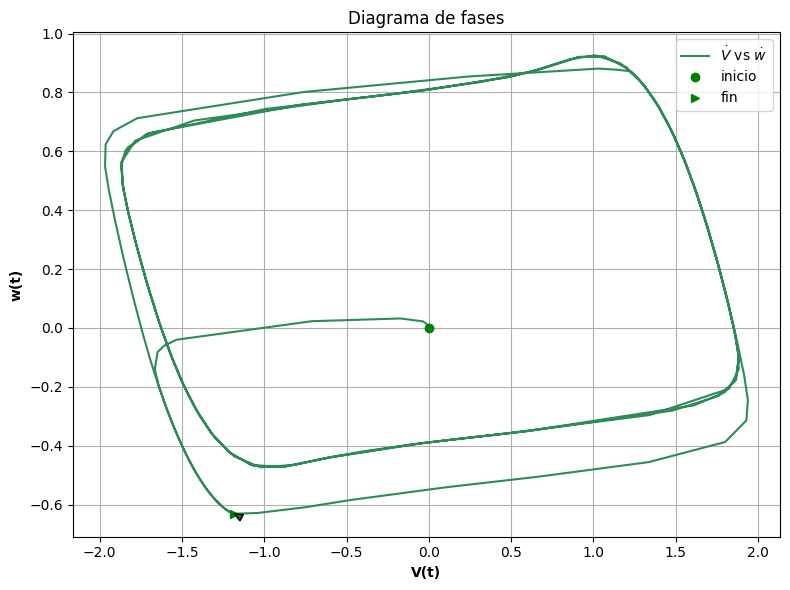

In [ ]:
dVdt, dwdt = solucion.y


plt.figure( figsize = (8,6))
plt.title('Diagrama de fases')
plt.plot(dVdt, dwdt, label = '$\dot{V}$ vs $\dot{w}$', color = 'seagreen')
plt.xlabel('V(t)', fontweight = 'bold')
plt.ylabel('w(t)', fontweight = 'bold')

plt.tight_layout()
plt.plot(V[0], w[0], 'go', label = 'inicio')
plt.plot(V[-1],w[-1], 'g>', label = 'fin')
plt.annotate('', xy = (V[-1], w[-1]), xytext= (V[-2], w[-2]),
             arrowprops=dict(facecolor = 'green',
                             width = 2, headwidth = 5, headlength = 6))
plt.legend()

plt.grid()

## Observaciones
En el protocolo de pulsos D.C, se nota como cada pulso inducido mueve el sistema de su punto de estabilidad y este reterna a dicho punto a medida que evoluciona el sistema, hasta que otro pulso del protocolo lo vuelve a alejar, de manera que el sistema escila hasta el último pulso donde pernece en el punto una vez alcansada nuevamente la estabilidad.

## Ejercicio 3: Retrato de Fase

Aquí se representa visualmente el comportamiento del sistema en el espacio de fases, trazando los campos de vectores para diferentes valores de $V$ y $w$. Un retrato de fase permite identificar las trayectorias y los patrones de estabilidad del sistema.

Usando el valor de corriente $I_{ext}=0$ cree el retrato de fase usando la ayuda del comando *meshgrid* para generar el camo vectorial, y ayúdese del comando de matplotlib *streamplot* para graficarlo. En el mismo gráfico muestre 3 trayectorias representativas con condiciones iniciales a su gusto.

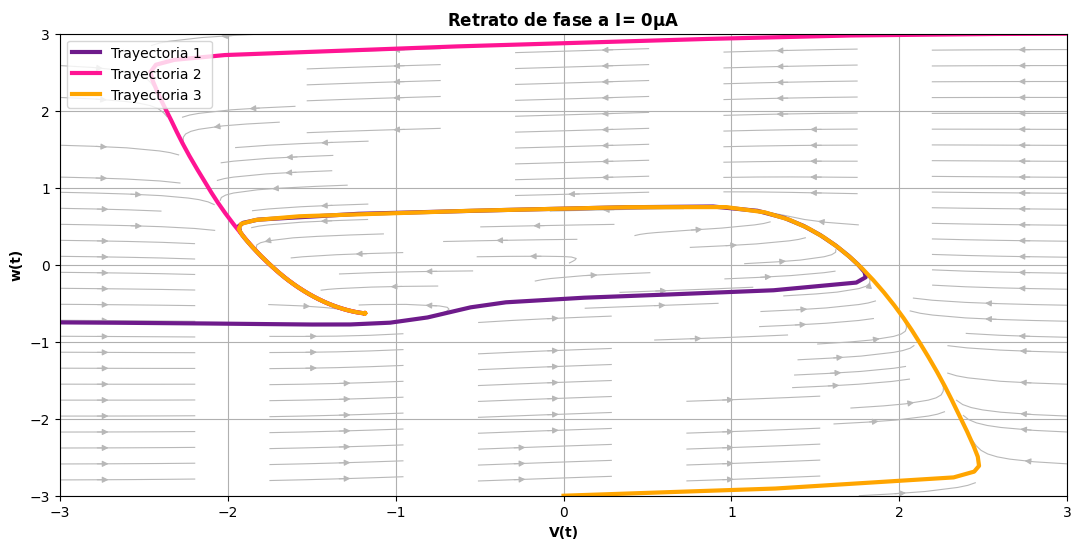

In [ ]:
def FitzHugh_Nagumo(t, X, Iext, a, b, tau):
  V  = X[0]
  w = X[1]
  I_ext = Iext

  dVdt = V - (V**3)/3-w+I_ext
  dwdt = (1/tau)*(V+a-b*w)

  return [dVdt, dwdt]

def retrato_fase(Ixt,ax):

  Iext, a,b,tau = Ixt, 0.3, 1.4, 20

  tspan = [-50, 350]
  tdenso = np.linspace(tspan[0], tspan[-1], 5000)

  X00 = [-3,-0.749]
  solucion0 = solve_ivp(FitzHugh_Nagumo, tspan, X00,
                      args = (Iext, a,b,tau), dense_output = True)

  V, w = solucion0.sol(tdenso)
  V0_dot, w0_dot = solucion0.y

  X01 = [3,3]
  solucion1 = solve_ivp(FitzHugh_Nagumo, tspan, X01,
                      args = (Iext, a,b,tau), dense_output = True)

  V1_dot, w1_dot = solucion1.y

  X02 = [0,-3]
  solucion2 = solve_ivp(FitzHugh_Nagumo, tspan, X02,
                      args = (Iext, a,b,tau), dense_output = True)

  V2_dot, w2_dot = solucion2.y

  V,w = np.meshgrid(np.linspace(-3, 3, 600), np.linspace(-3,3, 600))

  I_ext = 0
  V_malla = V - (V**3)/3-w+I_ext
  w_malla = (1/tau)*(V+a-b*w)



  ax.streamplot(V,w,V_malla, w_malla, linewidth = 0.8,
                 arrowsize = 0.9, arrowstyle= '-|>', maxlength= 0.25, color = '#b8b8b8')
  ax.plot(V0_dot, w0_dot, linewidth = 3,  color = '#6e1b8b', label = 'Trayectoria 1 ')
  ax.plot(V1_dot, w1_dot, linewidth = 3, color = 'deeppink', label = 'Trayectoria 2')
  ax.plot(V2_dot, w2_dot, linewidth = 3, color = 'orange', label = 'Trayectoria 3')
  ax.set_xlabel('V(t)', fontweight = 'bold')
  ax.set_ylabel('w(t)', fontweight = 'bold')


  ax.grid()
  ax.legend(loc='upper left')

fig, ax =  plt.subplots(figsize = (13,6))
ax.set_ylim(-3,3)

retrato_fase(0,ax)
ax.set_title('Retrato de fase a I= 0$ \mathbf{\mu A}$', fontweight = 'bold')
fig.show()

## Ejercicio 4: Curvas Nulas (Nullclines)

Las curvas nulas (nullclines) representan las regiones en el espacio de fases donde la derivada de $V$ o $w$ es cero. Estas curvas son útiles para localizar los puntos de equilibrio del sistema.

Curva nula de $V$: $w = V-\frac{V^3}{3}+I_{ext}$.

Curva nula de $w$: $w = \frac{V+a}{b}$

Agregue al retrato de fase las nulclinas.

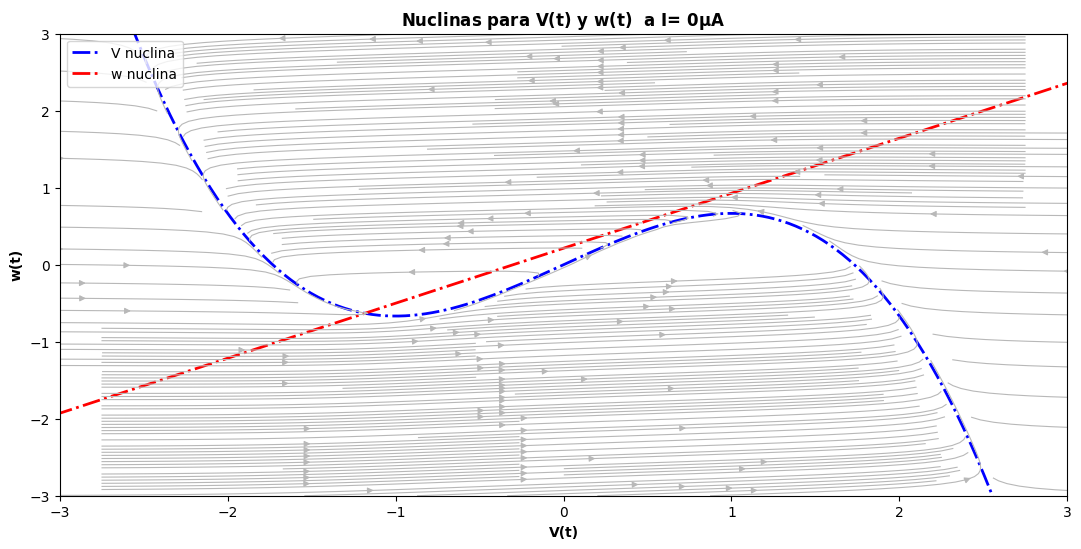

In [ ]:
Iext = 0
V_malla = np.linspace(-10,10,500)
w_malla = np.linspace(-3,3,500)

V, w = np.meshgrid(V_malla, w_malla)
z =  np.linspace(-10,10,00)
V_dot = V - (V**3)/3-w+Iext
w_dot =  (1/tau)*(V+a-b*w)

V_null = V_malla-(V_malla**3)/3+Iext
w_null = (V_malla+a)/b

fig, ax = plt.subplots(figsize = (13,6))


ax.set_title('Nuclinas para V(t) y w(t)  a I= 0$ \mathbf{\mu A}$', fontweight =  'bold')
ax.plot(V_malla, V_null, label = 'V nuclina', linewidth = 2, color ='blue', linestyle = 'dashdot')
ax.plot(V_malla, w_null, label= 'w nuclina', linewidth = 2, color ='red', linestyle = 'dashdot' )

ax.streamplot(V,w,V_dot, w_dot, linewidth = 0.8,
               density = 5, arrowsize = 0.9, arrowstyle= '-|>', maxlength= 0.7, color = '#b8b8b8')

ax.set_xlabel('V(t)', fontweight = 'bold')
ax.set_ylabel('w(t)', fontweight = 'bold')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.legend(loc = 'upper left')
fig.show()

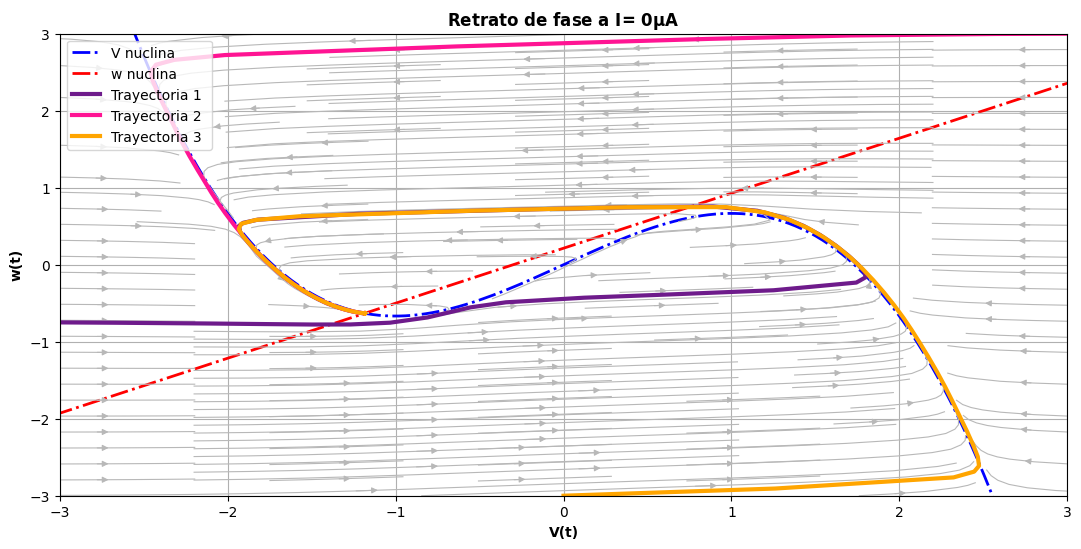

In [ ]:
Iext = 0
V_malla = np.linspace(-10,10,500)
w_malla = np.linspace(-3,3,500)

V, w = np.meshgrid(V_malla, w_malla)
z =  np.linspace(-10,10,00)
V_dot = V - (V**3)/3-w+Iext
w_dot =  (1/tau)*(V+a-b*w)

V_null = V_malla-(V_malla**3)/3+Iext
w_null = (V_malla+a)/b

fig, ax = plt.subplots(figsize = (13,6))


ax.set_title('Nuclinas para V(t) y w(t)', fontweight =  'bold')
ax.plot(V_malla, V_null, label = 'V nuclina', linewidth = 2, color ='blue', linestyle = 'dashdot')
ax.plot(V_malla, w_null, label= 'w nuclina', linewidth = 2, color ='red', linestyle = 'dashdot' )

ax.streamplot(V,w,V_dot, w_dot, linewidth = 0.8,
               density = 2, arrowsize = 0.9, arrowstyle= '-|>', maxlength= 0.7, color = '#b8b8b8')

retrato_fase(0,ax)

ax.set_xlabel('V(t)', fontweight = 'bold')
ax.set_ylabel('w(t)', fontweight = 'bold')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.legend(loc = 'upper left')
ax.set_title('Retrato de fase a I= 0$ \mathbf{\mu A}$', fontweight = 'bold')
fig.show()

## Ejercicio 5: Puntos de Equilibrio y Estabilidad

Los puntos de equilibrio son las intersecciones de las curvas nulas. O lo que es lo mismo la solución simultánea del r.h.s de la ecuación diferencial,

$$
0=V-\frac{V^3}{3}-w+I\\
0=V+a-bw
$$

De la segunda ecuación tenemos que $w = \frac{1}{b}(V+a)$ y que al ser reeemplazada en la primera nos queda el polinomio cúbico $\frac{1}{3}V^3 + V(\frac{1}{b}-1)+(\frac{a}{b}-I)=0$. Así los equilibrios se hallan econtrando las raíces del polinomio cúbico.

Para determinar la estabilidad de cada equilibrio hallado, calculamos el Jacobiano:

$$
J = \begin{pmatrix} \frac{\partial f_V}{\partial V} & \frac{\partial f_V}{\partial w} \\ \frac{\partial f_w}{\partial V} & \frac{\partial f_w}{\partial w} \end{pmatrix} = \begin{pmatrix} 1 - V^2 & -1 \\ \frac{1}{\tau} & -\frac{b}{\tau} \end{pmatrix}
$$

Evaluamos el Jacobiano en cada punto de equilibrio y calculamos sus valores propios.

Calcule el punto de equilibrio para el sistema que estamos estudiando e identifique si es estable o inestable. Grafíquelo en la figura que estamos haciendo colocando un símbolo relleno en caso de que el punto se estable y un símbolo vacío en caso de que sea inestable.

Pista: Use el comando *roots* de numpy para hallar las raices del polinomio


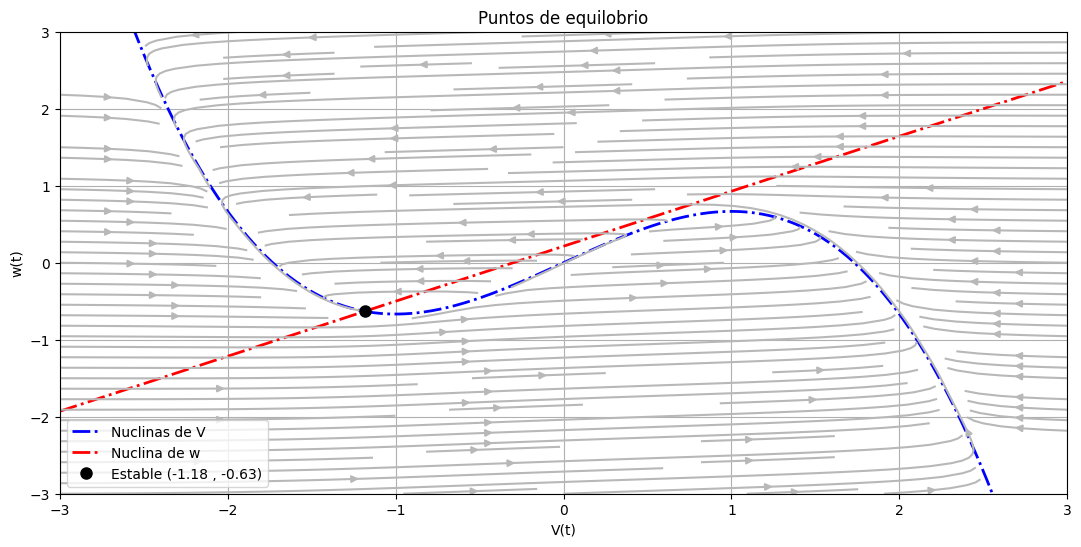

In [ ]:
from numpy.linalg import eig


def hallar_raices(Iext, a=0.3, b=1.4, tau=20): # se crea método para ser usado en el punto 6

  coeficientes = [1/3, 0, (1/b-1), a/b-Iext]

  V_raices = np.roots(coeficientes)

  V_raices = V_raices[np.isreal(V_raices)].real

  w_raices = (V_raices + a)/b

  puntos_estables = []
  puntos_inestables = []



  for V_raiz, w_raiz in zip(V_raices, w_raices): # zip une las tuplas en una sola
    #cada iterable es una pareja (V_raices, w_raices) que entra al ciclo
    J= np.array([[1 - V_raiz**2, -1],
                [1/tau, -b/tau]])
    eingevalores = eig(J)[0]
    if np.all(np.real(eingevalores)<0):
      puntos_estables.append((V_raiz, w_raiz))
    else:
      puntos_inestables.append((V_raiz, w_raiz))

  return puntos_estables, puntos_inestables


def graficar(p_estables, p_inestables, ax, Iext): #Se realiza en forma de método para facilitar el punto 6
  V_malla = np.linspace(-3,3,500)
  V,w = np.meshgrid(V_malla, np.linspace(-3,3,500))
  V_dot = V - (V**3)/3 - w + Iext
  w_dot = (1/tau)*(V + a - b*w)

  V_null = V_malla-(V_malla**3)/3+Iext
  w_null = (V_malla+a)/b

  ax.plot(V_malla, V_null, label= 'Nuclinas de V', color='blue', linewidth = 2,
          linestyle = 'dashdot')
  ax.plot(V_malla, w_null,  label = 'Nuclina de w', color ='red', linewidth = 2,
          linestyle = 'dashdot' )


  ax.streamplot(V, w, V_dot, w_dot, density = 1.5, arrowstyle= '-|>', color ='#b8b8b8')

  #Grafico de los puntos estables e inestables(para el punto 6)

  for V_raiz, w_raiz in p_estables:
    labl = f"Estable ({V_raiz:.2f} , {w_raiz:.2f})"
    ax.plot(V_raiz,w_raiz, 'ko', markersize = 8, label = labl)
  for V_raiz, w_raiz in p_inestables:
    labl = f'Inestable ({V_raiz:.2f},{w_raiz:.2f})'
    ax.plot(V_raiz, w_raiz, 'wo', markeredgecolor = 'black' ,label = labl)

  ax.set_xlabel('V(t)')
  ax.set_ylabel('w(t)')
  ax.set_ylim(-3,3)
  ax.grid()
  ax.legend(loc = 'lower left')

puntos_estables, puntos_inestables = hallar_raices(0)
fig, ax = plt.subplots(figsize = (13,6))
ax.set_title('Puntos de equilobrio')
graficar(puntos_estables, puntos_inestables, ax, 0)

## Ejercicio 6: Comparación de retratos de fase

Muestre en una figura con 3 paneles diferentes el retrato de fase completo (con todos los elementos calculados en los puntos 2 a 5) del sistema de FN para 3 valores diferentes de corriente: $I_{ext} = 0, 0.2, 0.4$

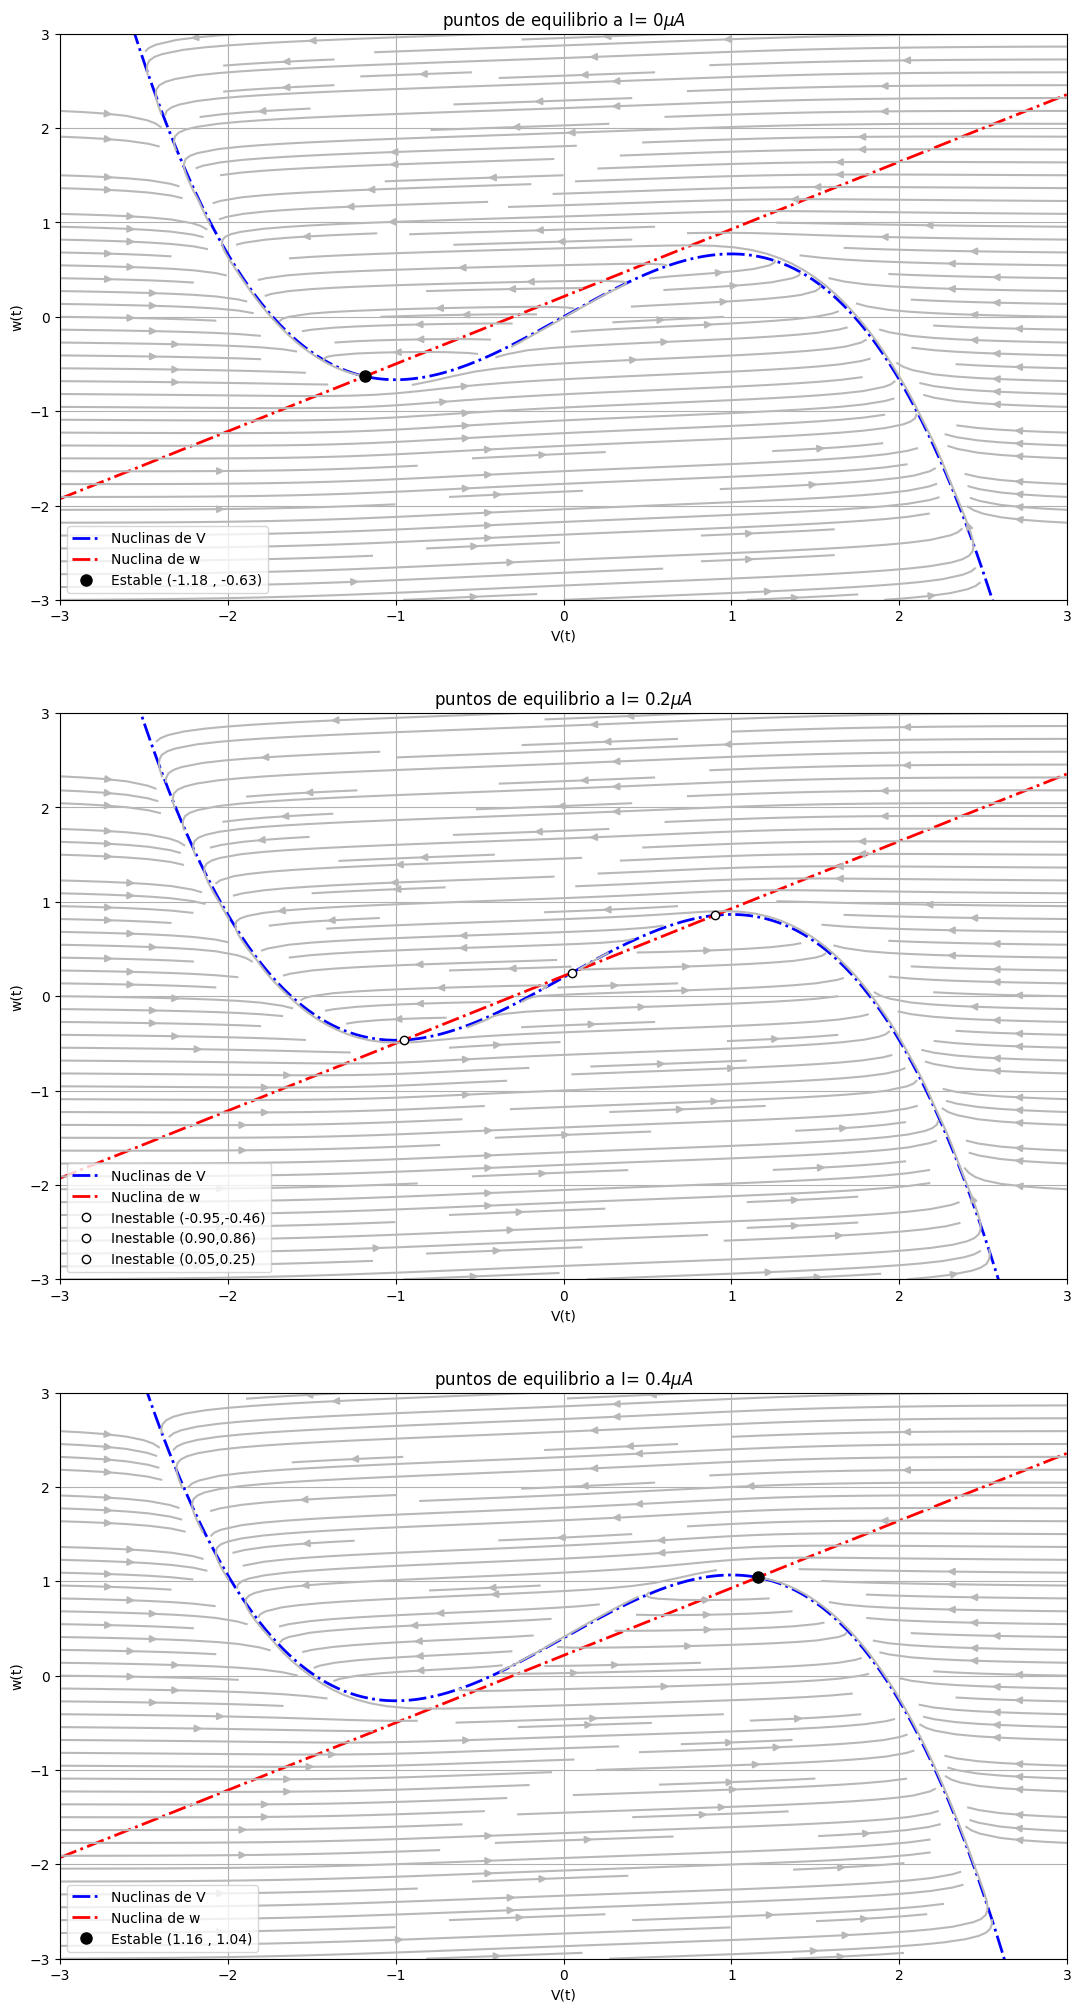

In [ ]:
puntos_estables1, puntos_inestables1 = hallar_raices(0)
puntos_estables2, puntos_inestables2 = hallar_raices(0.2)
puntos_estables3, puntos_inestables3 = hallar_raices(0.4)

fig, axs = plt.subplots(3, 1, figsize=(13,25))


graficar(puntos_estables1, puntos_inestables1, axs[0],0)
axs[0].set_title('puntos de equilibrio a I= 0$ \mu A$')

graficar(puntos_estables2, puntos_inestables2, axs[1], 0.2)
axs[1].set_title('puntos de equilibrio a I= 0.2$ \mu A$')

graficar(puntos_estables3, puntos_inestables3, axs[2], 0.4)
axs[2].set_title('puntos de equilibrio a I= 0.4$ \mu A$')

fig.show()


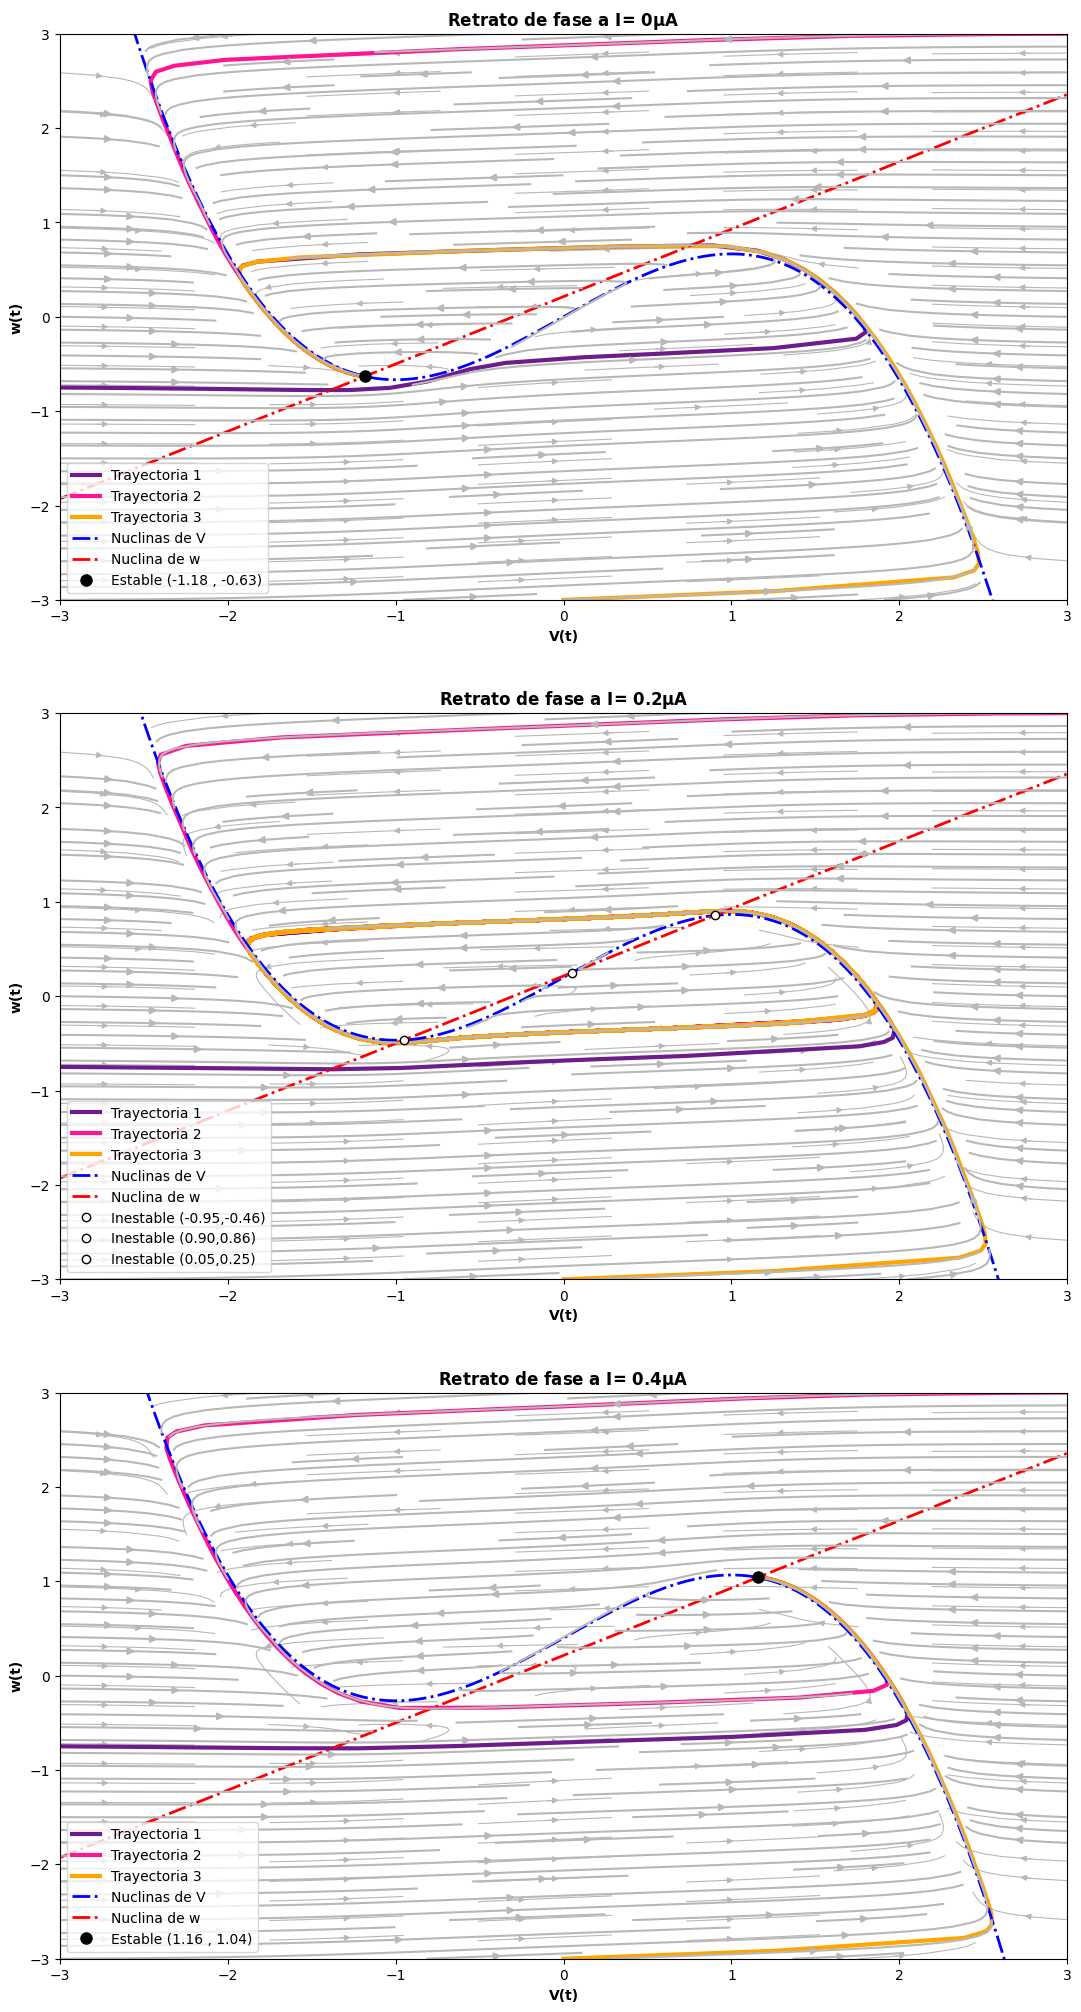

In [ ]:
puntos_estables1, puntos_inestables1 = hallar_raices(0)
puntos_estables2, puntos_inestables2 = hallar_raices(0.2)
puntos_estables3, puntos_inestables3 = hallar_raices(0.4)

fig, axs = plt.subplots(3, 1, figsize=(13,25))

retrato_fase(0,axs[0])
graficar(puntos_estables1, puntos_inestables1, axs[0],0)
axs[0].set_title('Retrato de fase a I= 0$ \mathbf{\mu A}$', fontweight = 'bold')

retrato_fase(0.2,axs[1])
graficar(puntos_estables2, puntos_inestables2, axs[1], 0.2)
axs[1].set_title('Retrato de fase a I= 0.2$ \mathbf{\mu A}$', fontweight = 'bold')

retrato_fase(0.4,axs[2])
graficar(puntos_estables3, puntos_inestables3, axs[2], 0.4)
axs[2].set_title('Retrato de fase a I= 0.4$ \mathbf{\mu A}$', fontweight = 'bold')

fig.show()